In [1]:
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import xarray as xr
import numpy as np
import os, glob
import warnings
from tqdm import tqdm
import seaborn as sns
import cmocean as cm

warnings.filterwarnings('ignore')

In [2]:
regions_of_interest = {
    "crs":[{'init': 'epsg:4326'}],
    "shapes" : {
        "inside bar" : [
            (-122.4809793, 37.8260567),
            (-122.4937819, 37.8195480),
            (-122.5071711, 37.8187344),
            (-122.5167839, 37.8181920),
            (-122.5222776, 37.8168359),
            (-122.5290621, 37.8097840),
            (-122.5514566, 37.8306667),
            (-122.5655352, 37.8396146),
            (-122.5772065, 37.8287685),
            (-122.5819853, 37.8214464),
            (-122.5833591, 37.8162935),
            (-122.5837025, 37.8073427),
            (-122.5830156, 37.8008324),
            (-122.5826722, 37.7973058),
            (-122.5771770, 37.7853681),
            (-122.5737425, 37.7799413),
            (-122.5692777, 37.7774991),
            (-122.5644694, 37.7753282),
            (-122.5548529, 37.7715289),
            (-122.5373370, 37.7682722),
            (-122.5266901, 37.7680008),
            (-122.5198212, 37.7688150),
            (-122.5208515, 37.7845541),
            (-122.4954364, 37.7940502),
            (-122.4820419, 37.8030026),
            (-122.4789509, 37.8103264),
            (-122.4799812, 37.8195480),
            (-122.4809793, 37.8260567)
        ],

        "inside bay" : [
            (-122.4761009, 37.8282261),
            (-122.4719810, 37.8112080),
            (-122.4667454, 37.8095127),
            (-122.4518967, 37.8093771),
            (-122.4418545, 37.8105299),
            (-122.4320698, 37.8114114),
            (-122.4203968, 37.8138525),
            (-122.4164486, 37.8146662),
            (-122.4113846, 37.8143271),
            (-122.4038315, 37.8123607),
            (-122.3969650, 37.8083599),
            (-122.3908710, 37.8027313),
            (-122.3997116, 37.7969666),
            (-122.3890696, 37.7878101),
            (-122.3753342, 37.7967632),
            (-122.3658927, 37.8077496),
            (-122.3185154, 37.8226668),
            (-122.2996319, 37.8232092),
            (-122.2880077, 37.8312090),
            (-122.3096438, 37.9122423),
            (-122.3986816, 37.9332314),
            (-122.4587639, 37.9404069),
            (-122.5137137, 37.9485293),
            (-122.5047809, 37.9288987),
            (-122.4795423, 37.9034387),
            (-122.4421073, 37.8832540),
            (-122.4506911, 37.8749889),
            (-122.4628823, 37.8760729),
            (-122.4663143, 37.8702462),
            (-122.4692338, 37.8728886),
            (-122.4722379, 37.8767504),
            (-122.4683755, 37.8827121),
            (-122.4748990, 37.8880636),
            (-122.4776445, 37.8919246),
            (-122.4851983, 37.8954467),
            (-122.4890602, 37.8984269),
            (-122.4921480, 37.9024905),
            (-122.5037341, 37.9119715),
            (-122.5325844, 37.8887410),
            (-122.5174753, 37.8730919),
            (-122.5058863, 37.8664518),
            (-122.4948124, 37.8743114),
            (-122.4887180, 37.8696364),
            (-122.4817657, 37.8657065),
            (-122.4762074, 37.8626572),
            (-122.4732685, 37.8576427),
            (-122.4747276, 37.8516790),
            (-122.4730110, 37.8482903),
            (-122.4704361, 37.8428003),
            (-122.4678612, 37.8338528),
            (-122.4718952, 37.8287685),
            (-122.4761009, 37.8282261)
        ],
        "south side" : [
            (-122.5771770, 37.7853681),
            (-122.5788832, 37.7889971),
            (-122.6798632, 37.7462860),
            (-122.7763386, 37.7017506),
            (-122.7674109, 37.6865373),
            (-122.7591720, 37.6707774),
            (-122.7461247, 37.6539268),
            (-122.7330786, 37.6392474),
            (-122.7192858, 37.6218459),
            (-122.6526420, 37.5734264),
            (-122.5990521, 37.5587311),
            (-122.5277686, 37.5581868),
            (-122.5277690, 37.5761474),
            (-122.5305148, 37.5859423),
            (-122.5325771, 37.5949198),
            (-122.5270842, 37.6019923),
            (-122.5212487, 37.6074321),
            (-122.5179865, 37.6087920),
            (-122.5135231, 37.6085201),
            (-122.5102606, 37.6120557),
            (-122.5080285, 37.6183107),
            (-122.5064846, 37.6267405),
            (-122.5040820, 37.6490340),
            (-122.5054556, 37.6753970),
            (-122.5109488, 37.7006641),
            (-122.5130089, 37.7131586),
            (-122.5150687, 37.7267372),
            (-122.5174717, 37.7405848),
            (-122.5195317, 37.7549727),
            (-122.5219351, 37.7682722),
            (-122.5266901, 37.7680008),
            (-122.5373370, 37.7682722),
            (-122.5548529, 37.7715289),
            (-122.5644694, 37.7753282),
            (-122.5692777, 37.7774991),
            (-122.5737425, 37.7799413),
            (-122.5771770, 37.7853681)
        ],
        "north side" : [
            (-122.5655368, 37.8430037),
            (-122.5662231, 37.8439526),
            (-122.5881954, 37.8528989),
            (-122.6026154, 37.8607599),
            (-122.6153176, 37.8668584),
            (-122.6302520, 37.8720078),
            (-122.6378057, 37.8783763),
            (-122.6458739, 37.8842024),
            (-122.6525679, 37.8901635),
            (-122.6642417, 37.8939566),
            (-122.6760864, 37.8905699),
            (-122.6829529, 37.8829830),
            (-122.7049255, 37.8797313),
            (-122.7227783, 37.8862346),
            (-122.7406311, 37.8938212),
            (-122.7523041, 37.9079083),
            (-122.7632904, 37.9203678),
            (-122.7783966, 37.9268676),
            (-122.7893829, 37.9106171),
            (-122.7983093, 37.8867766),
            (-122.8072357, 37.8656387),
            (-122.8154755, 37.8396146),
            (-122.8223419, 37.8173783),
            (-122.8257751, 37.8000186),
            (-122.8250885, 37.7761423),
            (-122.8223419, 37.7566013),
            (-122.8182220, 37.7441142),
            (-122.8089517, 37.7270087),
            (-122.7880087, 37.7012074),
            (-122.5806423, 37.7924224),
            (-122.5826722, 37.7973058),
            (-122.5830156, 37.8008324),
            (-122.5837025, 37.8073427),
            (-122.5833591, 37.8162935),
            (-122.5819853, 37.8214464),
            (-122.5772065, 37.8287685),
            (-122.5655352, 37.8396146),
            (-122.5655368, 37.8430037)
        ],

        "north outside" : [
            (-123.2020569, 37.5129939),
            (-123.2006836, 37.5140832),
            (-122.7790816, 37.6990342),
            (-122.8022578, 37.7226639),
            (-122.8110131, 37.7390915),
            (-122.8185659, 37.7568728),
            (-122.8240582, 37.7761423),
            (-122.8216545, 37.8054439),
            (-122.8165045, 37.8287685),
            (-122.8082652, 37.8591335),
            (-122.8000254, 37.8808152),
            (-122.7900679, 37.9041159),
            (-122.7735876, 37.9279508),
            (-122.8031152, 37.9534023),
            (-122.8113537, 37.9647714),
            (-122.8312683, 37.9799275),
            (-122.8587341, 37.9988682),
            (-122.8958121, 38.0086072),
            (-122.9383850, 38.0118533),
            (-122.9425049, 37.9977860),
            (-122.9562378, 37.9718086),
            (-123.0290222, 37.9853396),
            (-123.0564880, 38.0307857),
            (-123.3956909, 37.9831748),
            (-123.2789612, 37.6713209),
            (-123.2020569, 37.5129939)
        ],

        "south outside" : [
            (-123.0359714, 37.2565661),
            (-122.4617484, 37.2631241),
            (-122.4330097, 37.2633973),
            (-122.4295801, 37.2838873),
            (-122.4254600, 37.3084679),
            (-122.4233996, 37.3434132),
            (-122.4261468, 37.3614255),
            (-122.4295796, 37.3777966),
            (-122.4508639, 37.4173452),
            (-122.4587604, 37.4604159),
            (-122.4738689, 37.4887527),
            (-122.4972174, 37.4827592),
            (-122.5188435, 37.4914768),
            (-122.5270851, 37.5089088),
            (-122.5305184, 37.5244308),
            (-122.5305180, 37.5410385),
            (-122.5277686, 37.5581868),
            (-122.5990521, 37.5587311),
            (-122.6527405, 37.5750590),
            (-122.6959989, 37.6077041),
            (-122.7344513, 37.6425098),
            (-122.7571114, 37.6696904),
            (-122.7735909, 37.7044670),
            (-123.2048022, 37.5151725),
            (-123.0359714, 37.2565661)
        ],

        "north mouth shore" : [
            (-122.4809793, 37.8260567),
            (-122.4815941, 37.8303955),
            (-122.5267410, 37.8349374),
            (-122.5540352, 37.8486970),
            (-122.5655352, 37.8396146),
            (-122.5514566, 37.8306667),
            (-122.5290621, 37.8097840),
            (-122.5222776, 37.8168359),
            (-122.5167839, 37.8181920),
            (-122.5071711, 37.8187344),
            (-122.4937819, 37.8195480),
            (-122.4809793, 37.8260567)
        ],

        "south mouth shore" : [
            (-122.5198212, 37.7688150),
            (-122.5208515, 37.7845541),
            (-122.4954364, 37.7940502),
            (-122.4820419, 37.8030026),
            (-122.4789509, 37.8103264),
            (-122.4731827, 37.8072071),
            (-122.4815083, 37.7869283),
            (-122.5011635, 37.7842828),
            (-122.5095749, 37.7808232),
            (-122.5098324, 37.7690186),
            (-122.5197887, 37.7687472)
        ],

        "inside bay shore south" : [
            (-122.4778175, 37.8129032),
            (-122.4771309, 37.8058508),
            (-122.4745560, 37.8005611),
            (-122.4386787, 37.8034095),
            (-122.4165344, 37.8061221),
            (-122.4055481, 37.8038164),
            (-122.3997116, 37.7969666),
            (-122.3908710, 37.8027313),
            (-122.3969650, 37.8083599),
            (-122.4038315, 37.8123607),
            (-122.4113846, 37.8143271),
            (-122.4164486, 37.8146662),
            (-122.4203968, 37.8138525),
            (-122.4320698, 37.8114114),
            (-122.4418545, 37.8105299),
            (-122.4518967, 37.8093771),
            (-122.4667454, 37.8095127),
            (-122.4778175, 37.8129032)
        ],

        "inside bay shore north" : [
            (-122.4794269, 37.8271414),
            (-122.4793625, 37.8268702),
            (-122.4761009, 37.8270058),
            (-122.4738034, 37.8271414),
            (-122.4703691, 37.8282261),
            (-122.4672782, 37.8333783),
            (-122.4696823, 37.8428681),
            (-122.4720863, 37.8515434),
            (-122.4762074, 37.8626572),
            (-122.4803286, 37.8664518),
            (-122.4948124, 37.8743114),
            (-122.5033092, 37.8676037),
            (-122.4945545, 37.8607260),
            (-122.4840403, 37.8543221),
            (-122.4794483, 37.8448676),
            (-122.4742126, 37.8348357),
            (-122.4796200, 37.8344290),
            (-122.4794269, 37.8271414)
        ],

        "bolinas shore" : [
            (-122.5655368, 37.8430037),
            (-122.5655352, 37.8396146),
            (-122.5463104, 37.8515434),
            (-122.6194382, 37.9008651),
            (-122.6784897, 37.9352623),
            (-122.7543640, 37.9531316),
            (-122.7783966, 37.9268676),
            (-122.7632904, 37.9203678),
            (-122.7523041, 37.9079083),
            (-122.7406311, 37.8938212),
            (-122.7227783, 37.8862346),
            (-122.7049255, 37.8797313),
            (-122.6829529, 37.8829830),
            (-122.6760864, 37.8905699),
            (-122.6642417, 37.8939566),
            (-122.6525679, 37.8901635),
            (-122.6458739, 37.8842024),
            (-122.6378057, 37.8783763),
            (-122.6302520, 37.8720078),
            (-122.6153176, 37.8668584),
            (-122.6026154, 37.8607599),
            (-122.5881954, 37.8528989),
            (-122.5662231, 37.8439526),
            (-122.5655368, 37.8430037)
        ],

        "pacifica shore" : [
            (-122.4996185, 37.7566013),
            (-122.5016785, 37.7696292),
            (-122.5219351, 37.7682722),
            (-122.5195317, 37.7549727),
            (-122.5174717, 37.7405848),
            (-122.5150687, 37.7267372),
            (-122.5130089, 37.7131586),
            (-122.5109488, 37.7006641),
            (-122.5054556, 37.6753970),
            (-122.5040820, 37.6490340),
            (-122.5064846, 37.6267405),
            (-122.5080285, 37.6183107),
            (-122.5102606, 37.6120557),
            (-122.5135231, 37.6085201),
            (-122.5179865, 37.6087920),
            (-122.5212487, 37.6074321),
            (-122.5270842, 37.6019923),
            (-122.5329208, 37.6010402),
            (-122.5330925, 37.5947838),
            (-122.5317192, 37.5856702),
            (-122.5317192, 37.5754672),
            (-122.5293159, 37.5583228),
            (-122.5009918, 37.5565538),
            (-122.4851990, 37.6642550),
            (-122.4996185, 37.7566013)
        ],
        
       "half moon shore" : [
            (-122.4041748, 37.2609381),
            (-122.4041748, 37.2614846),
            (-122.3962784, 37.2926280),
            (-122.3938751, 37.3207552),
            (-122.3911285, 37.3641543),
            (-122.3911285, 37.3636085),
            (-122.4440002, 37.4781276),
            (-122.4982452, 37.5587311),
            (-122.5277686, 37.5581868),
            (-122.5305180, 37.5410385),
            (-122.5305184, 37.5244308),
            (-122.5270851, 37.5089088),
            (-122.5188435, 37.4914768),
            (-122.4972174, 37.4827592),
            (-122.4738689, 37.4887527),
            (-122.4587604, 37.4604159),
            (-122.4508639, 37.4173452),
            (-122.4295796, 37.3777966),
            (-122.4261468, 37.3614255),
            (-122.4233996, 37.3434132),
            (-122.4254600, 37.3084679),
            (-122.4295801, 37.2838873),
            (-122.4330097, 37.2633973),
            (-122.4041748, 37.2609381)
        ],
        
        "drakes bay shore" : [
            (-122.7543640, 37.9466342),
            (-122.8316116, 38.0153697),
            (-122.8855133, 38.0297040),
            (-122.9397583, 38.0397093),
            (-123.0029297, 38.0094187),
            (-123.0125427, 37.9994093),
            (-123.0224991, 37.9961627),
            (-123.0290222, 37.9853396),
            (-122.9562378, 37.9718086),
            (-122.9425049, 37.9977860),
            (-122.9383850, 38.0118533),
            (-122.8958121, 38.0086072),
            (-122.8587341, 37.9988682),
            (-122.8312683, 37.9799275),
            (-122.8113537, 37.9647714),
            (-122.8031152, 37.9534023),
            (-122.7735876, 37.9279508),
            (-122.7543640, 37.9466342)
        ]
    },
}


In [3]:
def load_polygons(regions):
    """ Create and return a geopandas dataframe with each of the polygons if interest
    polygons are generated at https://www.keene.edu/campus/maps/tool/

    Returns:
        geopandas.GeoDataFrame: dataframe with each of the polygons of AOI that are geographically references to WGS84
        
    """

    shapes = [k for k in regions['shapes'].keys()]
    polys = [Polygon(regions['shapes'][k]) for k in shapes]
    d = {
        'box': shapes,
        'geometry': polys
        }
    return gpd.GeoDataFrame(d, crs=regions['crs'][0])
regions = load_polygons(regions_of_interest)
shapes = [k for k in regions_of_interest['shapes'].keys()]



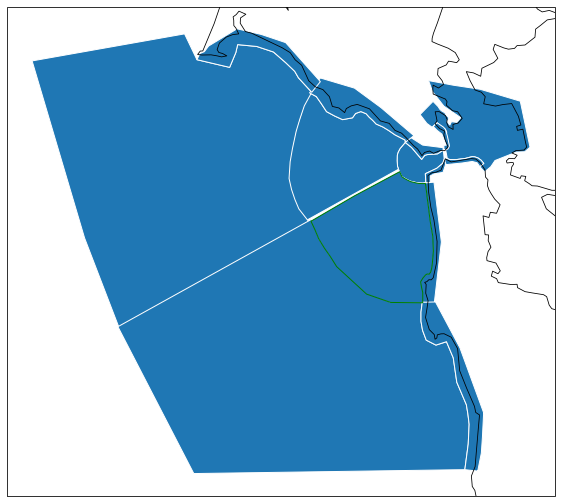

In [4]:
fig = plt.figure(figsize=(12,9))
gs = fig.add_gridspec(1, 1)
cart_proj = ccrs.PlateCarree()

ax = fig.add_subplot(gs[0],projection=ccrs.PlateCarree())
regions.plot(ax=ax,edgecolor='w')
regions.query("box == 'south side'").plot(edgecolor='g',ax=ax)
ax.coastlines('10m', linewidth=0.8,zorder=200)
# plt.savefig('./Figures/regions.png',dpi=300)

In [5]:
base_folder='/home/pdaniel/SurfaceCurrentMaps/DailyModelRuns/model_output/'
files = sorted(glob.glob(base_folder+'*.nc'))

Capturing final particle postition

`pd.Dataframe` with a column for each location. rows are by the particle deployment beginning time, with each column being the summed finall location of the particle.

Get the first lat/lon of the Status 1 locations for each particle and run it through each of the polygons.


__Revised Particle Location Selection Method__

In [6]:
final_regions = pd.DataFrame(columns= [k for k in regions_of_interest['shapes'].keys()])

for i, f in enumerate(tqdm(files)):
    ds = xr.open_dataset(f)
    if ds['trajectory'].shape[0] < 751:
        try:
            start_time = np.array(ds['time'].values[0])
            start_times = np.append(start_times,start_time)
        
        except NameError:
            start_times = np.array(ds['time'].values[0])

        df = ds['status'].to_dataframe()
        final_locs = np.zeros((750,3))
        for traj, new_df in df.groupby(level=0):
            # Look for the last position of particles that have exited the model (beached or domain)
            if new_df.query('status == 1').shape[0] != 0:
                final_locs[traj-1,1:] = new_df.query('status == 1').iloc[-1][['lat','lon']].values
                final_locs[traj-1,0] = traj
            # Look for the last position of particles still in the model
            else:
                final_locs[traj-1,1:] = new_df.query('status == 0').iloc[-1][['lat','lon']].values
                final_locs[traj-1,0] = traj

        final_pos = pd.DataFrame(data=final_locs,columns=['trajectory','lat','lon'])
        points = gpd.GeoDataFrame(final_pos, geometry=gpd.points_from_xy(final_pos.lon, final_pos.lat),crs=regions_of_interest['crs'][0])
        points
        data = np.zeros(shape=regions.shape[0])

        for index, part in points.iterrows():
            ix = [i for i in range(len(regions)) if part['geometry'].within(regions.iloc[i]['geometry'])]
            if ix is not None:
                data[ix] = data[ix] + 1
        data = data/np.sum(data)
        final_regions = final_regions.append(pd.DataFrame(data.reshape(1,-1), columns=list(final_regions)), ignore_index=True)
final_regions['start_time'] = start_times
final_regions.index = final_regions['start_time']

100%|██████████| 263/263 [15:46<00:00,  3.60s/it]


In [8]:
final_regions['in bay'] = final_regions['inside bay'] + final_regions['inside bay shore south'] + final_regions['inside bay shore south']
final_regions['outside'] = final_regions['north outside'] + final_regions['south outside']
final_regions['mouth'] = final_regions['north mouth shore'] + final_regions['south mouth shore']
final_regions['south shore'] = final_regions['half moon shore'] + final_regions['pacifica shore']
final_regions['north shore'] = final_regions['bolinas shore'] + final_regions['drakes bay shore']
# final_short = final_regions[['in bay','north mouth shore','south mouth shore','bolinas shore','pacifica shore','half moon shore','drakes bay shore']]
final_short = final_regions[['in bay','south side','north side','north mouth shore','south mouth shore','south shore','north shore','outside']]

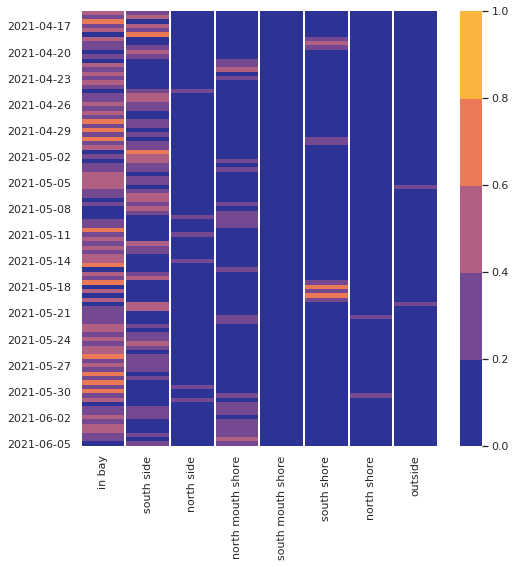

In [9]:
sns.set_theme(style="darkgrid")
march = final_short.query("start_time >= 20210415")
# march = final_short.query("start_time >= 20210201 and start_time < 20210301")
# march = march[march >  0]
fig, ax  = plt.subplots()
fig.set_size_inches(8,8)
cmap = sns.color_palette("cmo.thermal", n_colors=5)

sns.heatmap(march,
            cmap=cmap,
            vmin=0,vmax=1,
            cbar_kws={"shrink": 1})

for i in range(march.shape[1]+1):
    ax.axvline(i, color='white', lw=2)
# plt.tight_layout()
ax.set_ylabel('')

# Whacky reformatting of y label!!
locs, labels = plt.yticks(); # Split the locations of each tick and the Text object
fmt = lambda x: x.get_text()[:10]; # create a Lambda function to only return first 10 characters
plt.yticks(locs[1::2], [fmt(i) for i in labels[1::2]]); # Re-aplly every other label


In [16]:
final_short.sum(axis=1)

start_time
2021-02-10 08:46:00    0.976776
2021-02-10 19:27:00    1.040951
2021-02-11 09:25:00    1.002699
2021-02-11 20:14:00    1.014550
2021-02-12 10:00:00    0.990385
                         ...   
2021-04-05 04:43:00    0.953146
2021-04-05 15:02:00    0.981308
2021-04-06 05:41:00    0.990667
2021-04-06 16:18:00    0.994638
2021-04-07 06:26:00    0.986486
Length: 107, dtype: float64

In [23]:
final_regions[shapes]

,inside bar,inside bay,south side,north side,north outside,south outside,north mouth shore,south mouth shore,inside bay shore south,inside bay shore north,bolinas shore,pacifica shore,half moon shore,drakes bay shore
start_time,,,,,,,,,,,,,,
2021-02-10 08:46:00,0.002732,0.054645,0.248634,0.266393,0.0,0.000000,0.204918,0.180328,0.010929,0.031421,0.0,0.000000,0.000000,0.0
2021-02-10 19:27:00,0.001321,0.092470,0.457067,0.025099,0.0,0.000000,0.077939,0.258917,0.063408,0.021136,0.0,0.002642,0.000000,0.0
2021-02-11 09:25:00,0.002699,0.012146,0.524966,0.000000,0.0,0.000000,0.194332,0.139001,0.020243,0.014845,0.0,0.091768,0.000000,0.0
2021-02-11 20:14:00,0.000000,0.035714,0.388889,0.000000,0.0,0.027778,0.185185,0.167989,0.025132,0.010582,0.0,0.158730,0.000000,0.0
2021-02-12 10:00:00,0.000000,0.059066,0.101648,0.000000,0.0,0.234890,0.148352,0.271978,0.010989,0.020604,0.0,0.148352,0.004121,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-05 04:43:00,0.046854,0.269076,0.514056,0.010710,0.0,0.000000,0.057564,0.070950,0.002677,0.002677,0.0,0.025435,0.000000,0.0
2021-04-05 15:02:00,0.010681,0.528705,0.369826,0.001335,0.0,0.000000,0.061415,0.014686,0.000000,0.008011,0.0,0.005340,0.000000,0.0
2021-04-06 05:41:00,0.005333,0.333333,0.532000,0.000000,0.0,0.005333,0.104000,0.010667,0.001333,0.005333,0.0,0.002667,0.000000,0.0
